# **Patient's Condition Classification Using Drug Reviews**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import os # Import the os module

# Loading the excel file
file_path = 'Drug.xlsx'

# Check if the file exists
if not os.path.exists(file_path):
    print(f"Error: File not found at {file_path}")
elif os.path.getsize(file_path) == 0:
    print(f"Error: File is empty at {file_path}")
else:
    try:
        # data = pd.read_excel('/content/sample_data/drugsCom_raw (2) (1).xlsx')
        data = pd.read_excel(file_path)

        # Display the first 5 records
        print("File loaded successfully. First 5 rows:")
        display(data.head()) # Use display for better formatting in Jupyter

    except Exception as e:
        print(f"An error occurred while reading the Excel file: {e}")
        print("Please verify if the file is a valid and uncorrupted .xlsx file.")


# Display the first 5 records
# data.head() # This was redundant after moving the head() call inside the try block


Error: File not found at Drug.xlsx


In [11]:
# Loading the excel file
# data = pd.read_excel('/content/sample_data/drugsCom_raw (2) (1).xlsx')
data = pd.read_excel(r'E:/ExcelR/Project_2/drugsCom_raw.xlsx')

# Display the first 5 records
data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37


In [15]:
data.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [22]:
# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in data.columns:
    data.drop(columns='Unnamed: 0', inplace=True)

# Filter rows where the condition is one of the target conditions
target_conditions = ['Depression', 'High Blood Pressure', 'Diabetes, Type 2']
data = data[data['condition'].isin(target_conditions)]

# Reset the index to start from 0
data.reset_index(drop=True, inplace=True)

# Display the first 5 rows of the filtered data
data.head()


,drugName,condition,review,rating,date,usefulCount
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,2017-03-09,54
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,2011-05-07,3
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,2016-04-27,3
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,2017-10-24,24
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,2013-06-20,166


In [ ]:
# Display 5 random sample
data.sample(5)

In [26]:
# Size of rows and columns
data.shape

(13944, 6)

In [ ]:
# Get information about columns types and missing values
data.info()

In [30]:
# Get basic statistical details of numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,13944.0,6.862952,3.207061,1.0,4.0,8.0,10.0,10.0
usefulCount,13944.0,45.737880,51.782627,0.0,16.0,31.0,59.0,1291.0


In [32]:
# Basic statistics summary of Object features
data.describe(include = 'object').T

,count,unique,top,freq
drugName,13944,334,Bupropion,549
condition,13944,3,Depression,9069
review,13944,9802,"""I have suffered from severe depression/anxiet...",3


In [34]:
# Get features names
data.columns

Index(['drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'], dtype='object')

In [36]:
# Filtering categorical columns
data.select_dtypes(include='object').columns

Index(['drugName', 'condition', 'review'], dtype='object')

In [38]:
# Checking duplicate values
data.duplicated().sum()

0

In [40]:
# Count of each condition
data['condition'].value_counts()

Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: condition, dtype: int64

In [42]:
# Checking missing values in filtered data
missing = data.isnull().sum()
print("Missing values in the filtered data:")
print(missing)

Missing values in the filtered data:
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64


In [44]:
# Access the third review (index 2) in the 'review' column
data.loc[2, 'review']

'"my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better"'

In [46]:
# Text cleaning
import re
import string
import nltk

# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Smrithi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Smrithi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Smrithi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [47]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(raw_review):
    review_text = BeautifulSoup(raw_review , 'html.parser').get_text() # Delete HTML
    letters_only = re.sub('[^a-zA-Z]',' ',review_text) # Make a space
    words = letters_only.lower().split()               # lower letters
    meaningful_words = [w for w in words if not w in stop] # Stopwords
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words] # Lemmitization
    return( ' '.join(lemmitize_words)) # Space join words


In [48]:
# Cleaned text
data['clean_review'] = data['review'].apply(preprocess_text)
data['clean_review']

0        taken anti depressant year improvement mostly ...
1        week zoloft anxiety mood swing take mg morning...
2        gp started venlafaxine yesterday help depressi...
3        hey guy month since last post wanted give mont...
4        medicine saved life wit end anti depressant re...
                               ...                        
13939    fourth blood pressure pill feel like partly wo...
13940    bystolic foot arm numb blood sugar became seve...
13941    got diagnosed type doctor prescribed invokana ...
13942    third med tried anxiety mild depression week h...
13943    tekturna day effect immediate also calcium cha...
Name: clean_review, Length: 13944, dtype: object

**Univariate Analysis**

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_7960\2464971078.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='coolwarm')


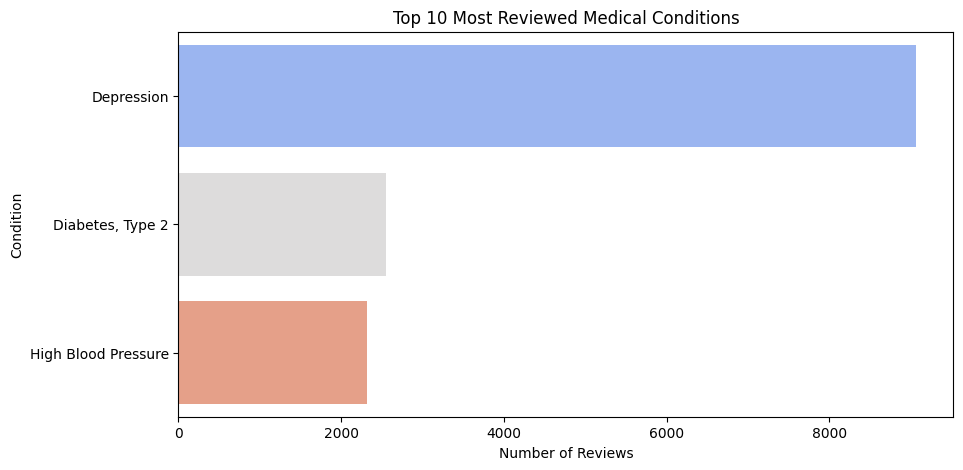

In [52]:
# Most Common Medical Conditions
top_conditions = data['condition'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='coolwarm')
plt.title('Top 10 Most Reviewed Medical Conditions')
plt.xlabel('Number of Reviews')
plt.ylabel('Condition')
plt.show()

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_7960\1034613805.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=data, palette='viridis')


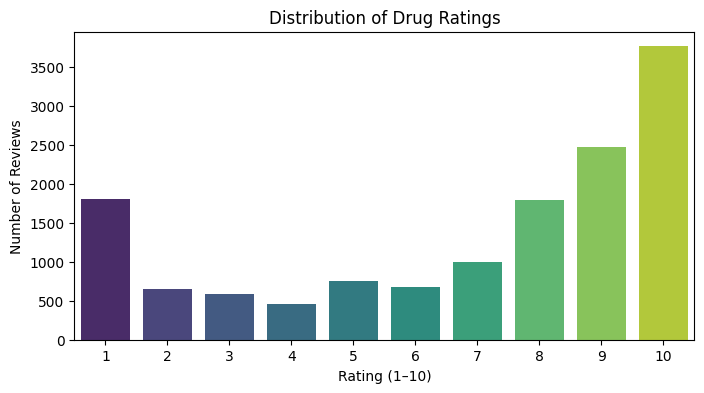

In [53]:
# Distribution of Drug Ratings
plt.figure(figsize=(8, 4))
sns.countplot(x='rating', data=data, palette='viridis')
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating (1–10)')
plt.ylabel('Number of Reviews')
plt.show()

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_7960\1333921635.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drugs.values, y=top_drugs.index, palette='cubehelix')


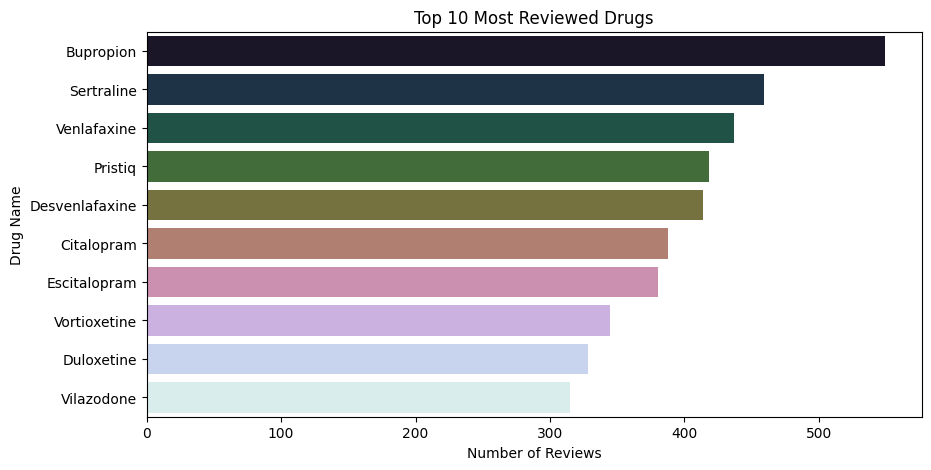

In [54]:
# Most Reviewed Drugs
top_drugs = data['drugName'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_drugs.values, y=top_drugs.index, palette='cubehelix')
plt.title('Top 10 Most Reviewed Drugs')
plt.xlabel('Number of Reviews')
plt.ylabel('Drug Name')
plt.show()

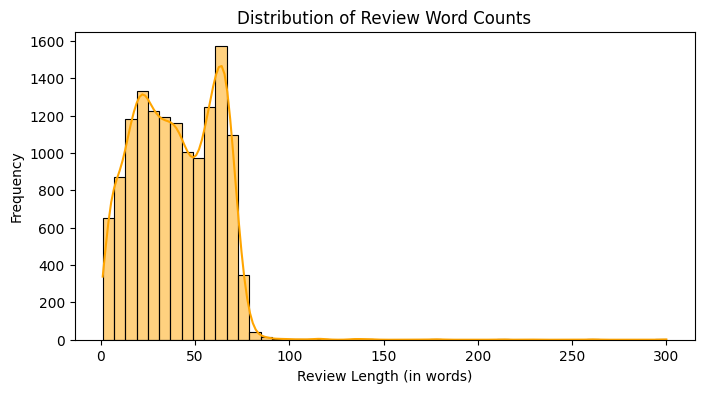

In [55]:
# Distribution of Review Lengths
data['review_length'] = data['clean_review'].apply(lambda x: len(x.split()))

# Plot the distribution
plt.figure(figsize=(8, 4))
sns.histplot(data['review_length'], bins=50, kde=True, color='orange')
plt.title('Distribution of Review Word Counts')
plt.xlabel('Review Length (in words)')
plt.ylabel('Frequency')
plt.show()

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_7960\1134290312.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='Set2')


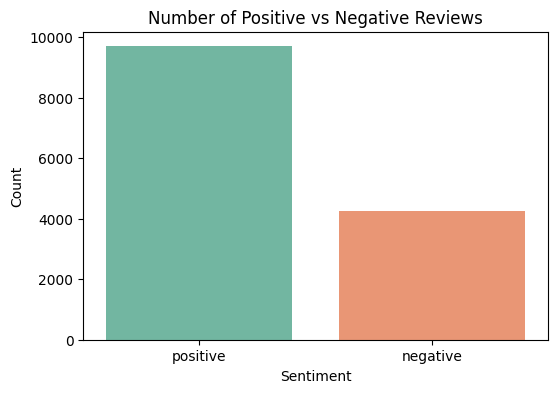

In [58]:
# Sentiment Distribution
data['Sentiment'] = data['rating'].apply(lambda x: 'positive' if x >= 6 else 'negative')

# Plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=data, palette='Set2')
plt.title('Number of Positive vs Negative Reviews')
plt.ylabel('Count')
plt.show()

**Bivariate Analysis**

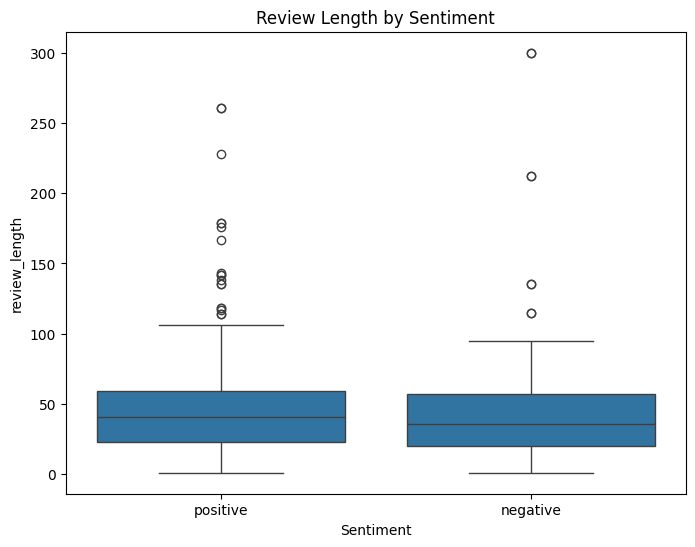

In [64]:
# Review Length vs Sentiment (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='review_length', data=data)
plt.title('Review Length by Sentiment')
plt.show()

In [66]:
# Word Frequency by Rating (1–5 Stars Only)
from collections import Counter
import matplotlib.pyplot as plt

# Ensure ratings are integers and filter only valid 1–5 ratings
data = data[data['rating'].isin([1, 2, 3, 4, 5,6,7,8,9,10])]

# Create a dictionary to hold word counts for each rating
rating_word_counts = {}

for rating in range(1, 11):
    # Filter reviews for this rating
    subset = data[data['rating'] == rating]

    # Combine all cleaned reviews into one big string
    all_text = " ".join(subset['clean_review'])

    # Split into words and count frequencies
    word_freq = Counter(all_text.split())

    # Save top 10 words for this rating
    rating_word_counts[rating] = word_freq.most_common(10)

# Display word frequency results
for rating in rating_word_counts:
    print(f"\nTop words for Rating {rating}:")
    for word, count in rating_word_counts[rating]:
        print(f"{word}: {count}")



Top words for Rating 1:
day: 1062
taking: 758
week: 721
mg: 706
month: 577
medication: 569
drug: 568
effect: 559
doctor: 537
side: 511

Top words for Rating 2:
day: 383
mg: 341
week: 310
taking: 302
effect: 280
side: 237
medication: 212
month: 207
feel: 205
started: 196

Top words for Rating 3:
mg: 356
day: 348
taking: 280
effect: 277
week: 255
side: 255
started: 200
month: 197
feel: 184
depression: 182

Top words for Rating 4:
mg: 298
day: 268
taking: 218
week: 212
effect: 211
side: 206
started: 192
feel: 169
month: 167
doctor: 150

Top words for Rating 5:
mg: 454
day: 439
week: 381
effect: 376
taking: 331
side: 329
month: 267
year: 262
feel: 254
started: 250

Top words for Rating 6:
mg: 415
day: 396
effect: 331
taking: 315
week: 313
side: 309
month: 305
depression: 271
year: 259
feel: 239

Top words for Rating 7:
mg: 751
day: 581
effect: 544
side: 502
taking: 489
depression: 469
week: 465
year: 437
feel: 418
month: 396

Top words for Rating 8:
mg: 1230
effect: 1056
day: 1017
side: 9

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_7960\3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


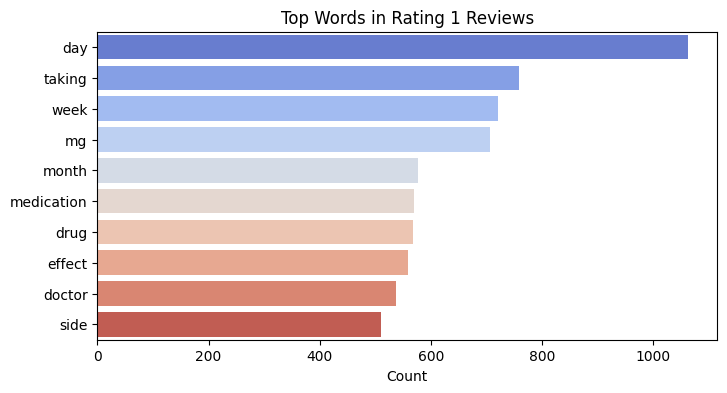

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_7960\3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


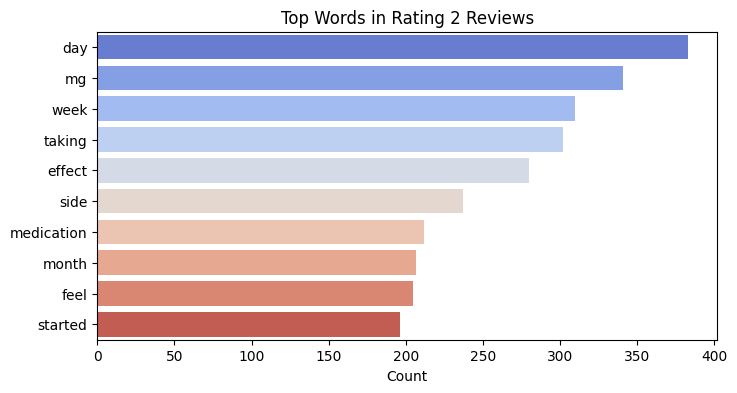

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_7960\3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


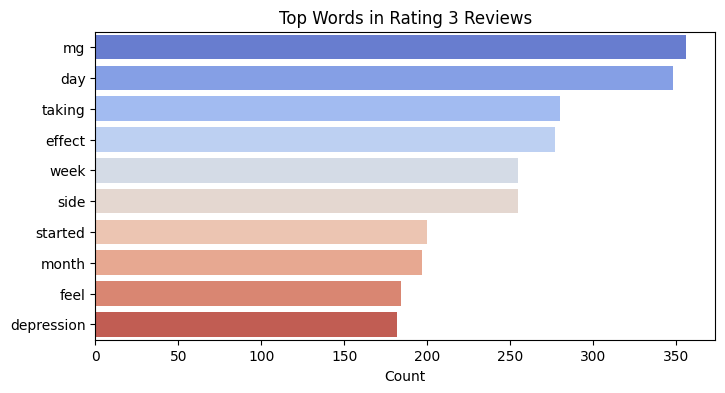

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_7960\3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


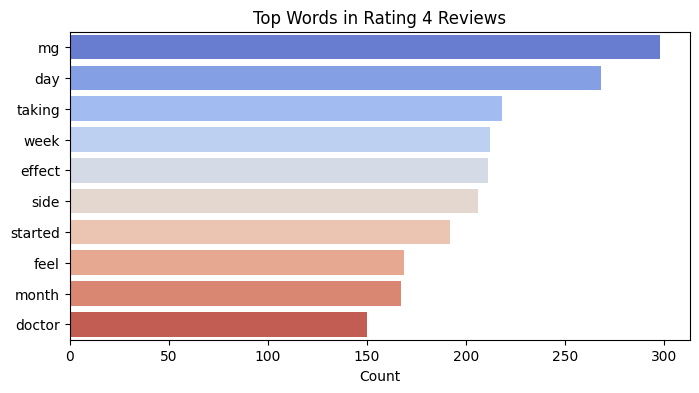

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_7960\3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


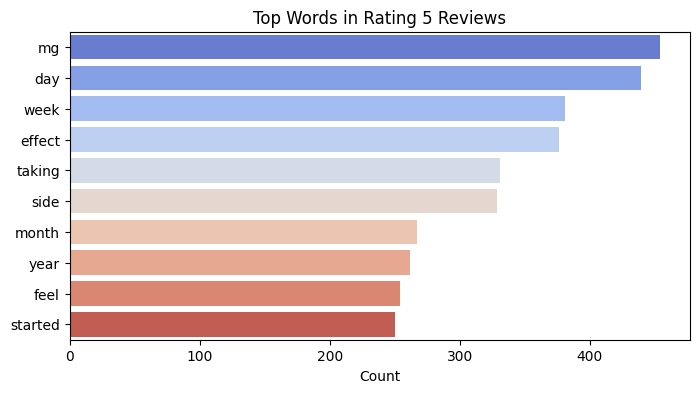

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_7960\3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


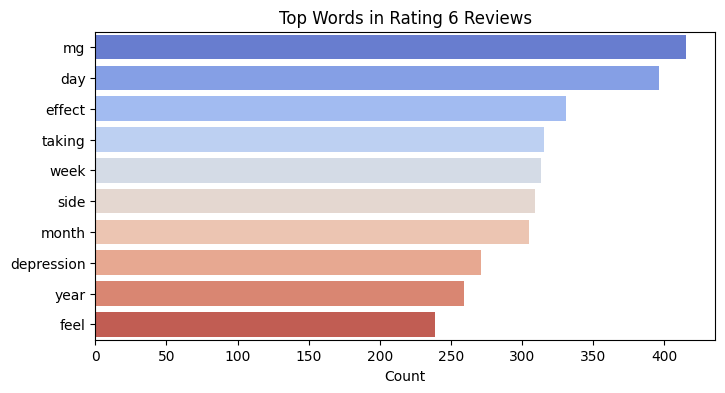

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_7960\3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


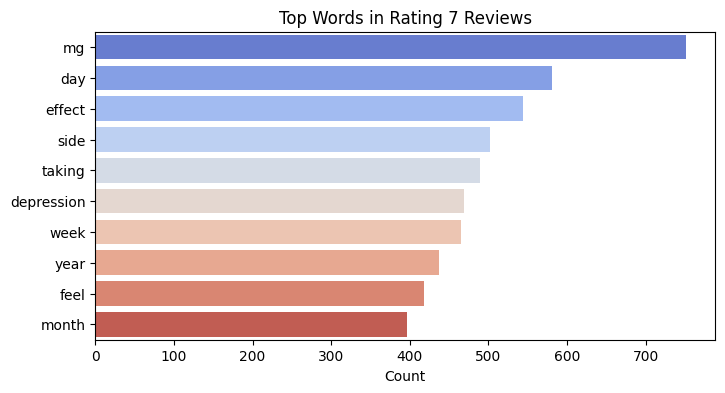

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_7960\3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


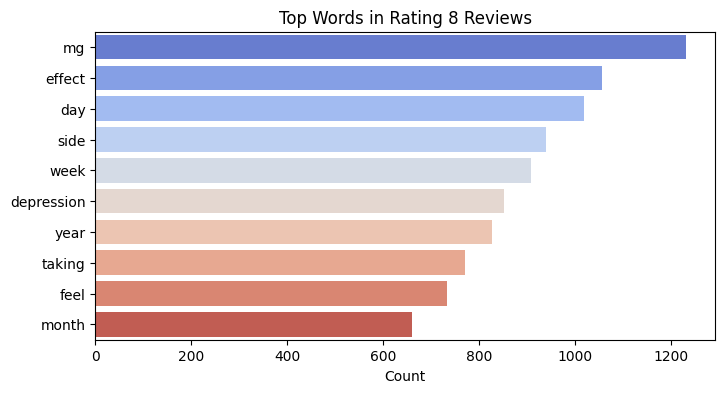

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_7960\3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


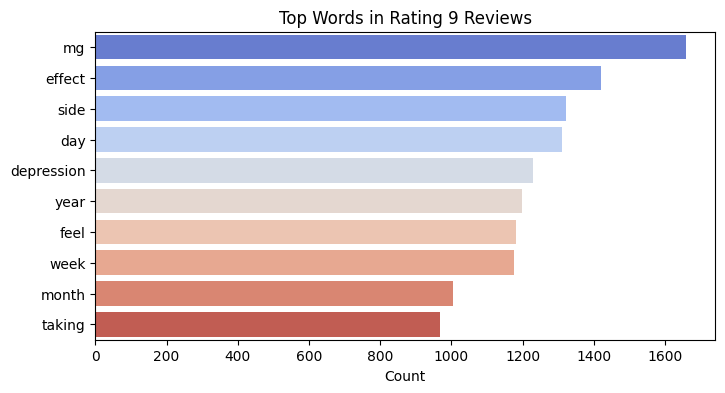

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_7960\3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


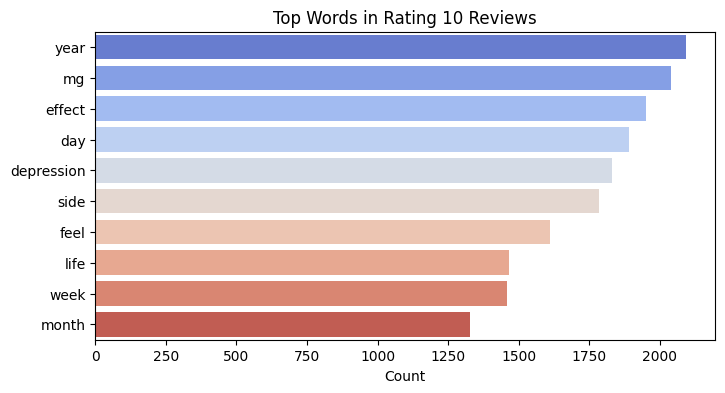

In [83]:
# Plot word frequencies
for rating, word_freq in rating_word_counts.items():
    words, counts = zip(*word_freq)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(counts), y=list(words), palette='coolwarm')
    plt.title(f'Top Words in Rating {rating} Reviews')
    plt.xlabel('Count')
    plt.show()

In [84]:
# N-Gram Analysis
from nltk.util import ngrams

def get_ngrams(texts, n):
    all_ngrams = []
    stop_words = set(stopwords.words('english'))

    for text in texts:
        text = preprocess_text(text)
        tokens = [word for word in text.split() if word not in stop_words]
        n_grams = list(ngrams(tokens, n))
        all_ngrams.extend(n_grams)

    return Counter(all_ngrams).most_common(15)

# Bigram Analysis
top_bigrams = get_ngrams(data['review'], 2)
print("Top Bigrams:", top_bigrams)

# Trigram Analysis
top_trigrams = get_ngrams(data['review'], 3)
print("Top Trigrams:", top_trigrams)

Top Bigrams: [(('side', 'effect'), 6042), (('blood', 'pressure'), 1951), (('feel', 'like'), 1038), (('blood', 'sugar'), 901), (('started', 'taking'), 898), (('depression', 'anxiety'), 791), (('mg', 'day'), 691), (('first', 'week'), 673), (('weight', 'gain'), 649), (('much', 'better'), 636), (('year', 'ago'), 567), (('panic', 'attack'), 564), (('taking', 'mg'), 545), (('felt', 'like'), 525), (('year', 'old'), 520)]
Top Trigrams: [(('high', 'blood', 'pressure'), 338), (('sexual', 'side', 'effect'), 229), (('feel', 'much', 'better'), 222), (('bad', 'side', 'effect'), 147), (('negative', 'side', 'effect'), 126), (('mg', 'per', 'day'), 110), (('mg', 'twice', 'day'), 99), (('first', 'two', 'week'), 99), (('blood', 'sugar', 'level'), 97), (('week', 'side', 'effect'), 97), (('side', 'effect', 'first'), 93), (('year', 'old', 'female'), 89), (('many', 'side', 'effect'), 89), (('experienced', 'side', 'effect'), 87), (('day', 'side', 'effect'), 87)]


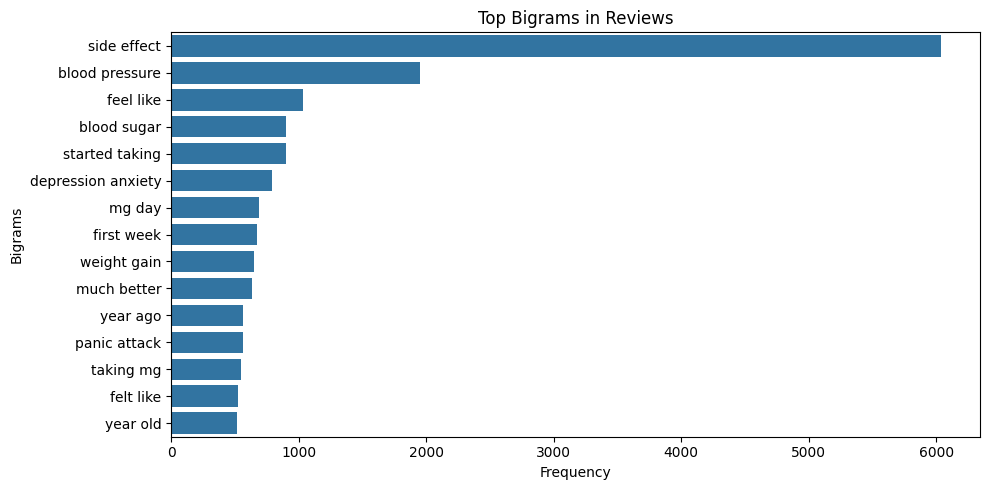

In [85]:
# Plot Top Bigrams
bigram_words = [' '.join(gram) for gram, count in top_bigrams]
bigram_counts = [count for gram, count in top_bigrams]

plt.figure(figsize=(10, 5))
sns.barplot(x=bigram_counts, y=bigram_words)
plt.title("Top Bigrams in Reviews")
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.tight_layout()
plt.show()

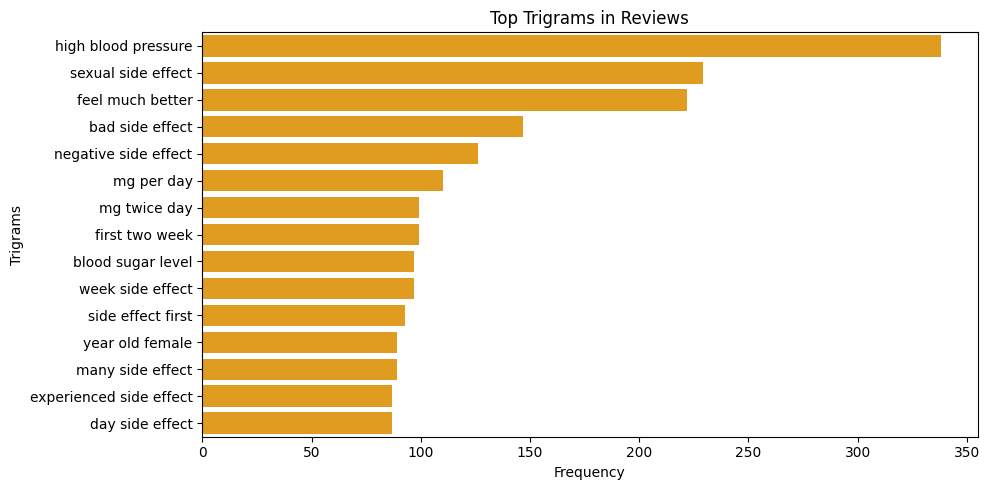

In [86]:
# Plot Top Trigrams
trigram_words = [' '.join(gram) for gram, count in top_trigrams]
trigram_counts = [count for gram, count in top_trigrams]

plt.figure(figsize=(10, 5))
sns.barplot(x=trigram_counts, y=trigram_words, color='orange')
plt.title("Top Trigrams in Reviews")
plt.xlabel("Frequency")
plt.ylabel("Trigrams")
plt.tight_layout()
plt.show()

In [88]:
data

,drugName,condition,review,rating,date,usefulCount,clean_review,review_length,Sentiment
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,2017-03-09,54,taken anti depressant year improvement mostly ...,43,positive
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,2011-05-07,3,week zoloft anxiety mood swing take mg morning...,28,positive
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,2016-04-27,3,gp started venlafaxine yesterday help depressi...,69,negative
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,2017-10-24,24,hey guy month since last post wanted give mont...,63,positive
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,2013-06-20,166,medicine saved life wit end anti depressant re...,51,positive
...,...,...,...,...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4,2009-07-15,39,fourth blood pressure pill feel like partly wo...,18,negative
13940,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1,2009-07-18,25,bystolic foot arm numb blood sugar became seve...,36,negative
13941,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9,2015-10-23,47,got diagnosed type doctor prescribed invokana ...,21,positive
13942,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2,2016-07-17,33,third med tried anxiety mild depression week h...,19,negative


In [89]:
data['Sentiment'].nunique()

2

In [90]:
data['rating'].nunique()

10

In [91]:
data['Sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [92]:
# Convert categorical into numerical

In [93]:
data['Sentiment_encoded'] = data['Sentiment'].map({
    'negative': 0,
    'positive': 1
})


In [94]:
data

,drugName,condition,review,rating,date,usefulCount,clean_review,review_length,Sentiment,Sentiment_encoded
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,2017-03-09,54,taken anti depressant year improvement mostly ...,43,positive,1
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,2011-05-07,3,week zoloft anxiety mood swing take mg morning...,28,positive,1
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,2016-04-27,3,gp started venlafaxine yesterday help depressi...,69,negative,0
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,2017-10-24,24,hey guy month since last post wanted give mont...,63,positive,1
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,2013-06-20,166,medicine saved life wit end anti depressant re...,51,positive,1
...,...,...,...,...,...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4,2009-07-15,39,fourth blood pressure pill feel like partly wo...,18,negative,0
13940,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1,2009-07-18,25,bystolic foot arm numb blood sugar became seve...,36,negative,0
13941,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9,2015-10-23,47,got diagnosed type doctor prescribed invokana ...,21,positive,1
13942,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2,2016-07-17,33,third med tried anxiety mild depression week h...,19,negative,0


In [95]:
data['drugName'].nunique()

334

In [96]:
# Word Cloud for all the reviews

In [97]:
from wordcloud import WordCloud

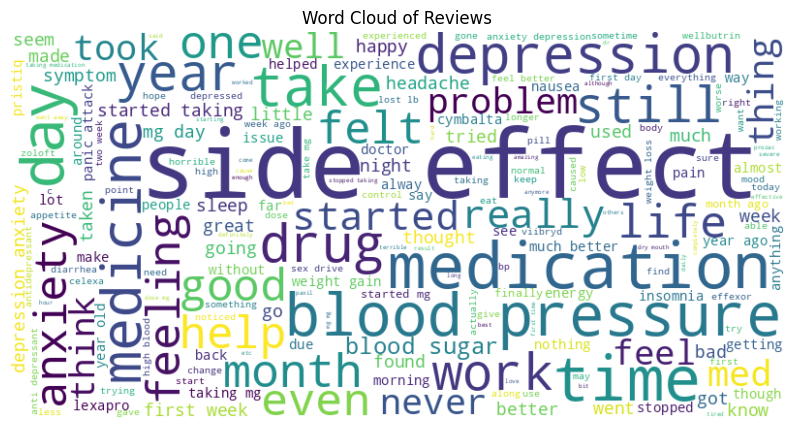

In [98]:
all_reviews = ' '.join(data['clean_review'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews")
plt.show()

In [99]:
# CountVectorizer - most common words

In [100]:
from sklearn.feature_extraction.text import CountVectorizer

In [101]:
vectorizer = CountVectorizer(max_features=20, stop_words='english')
X = vectorizer.fit_transform(data['clean_review'])

In [102]:
word_count = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_count['Sentiment_encoded'] = data['Sentiment_encoded']

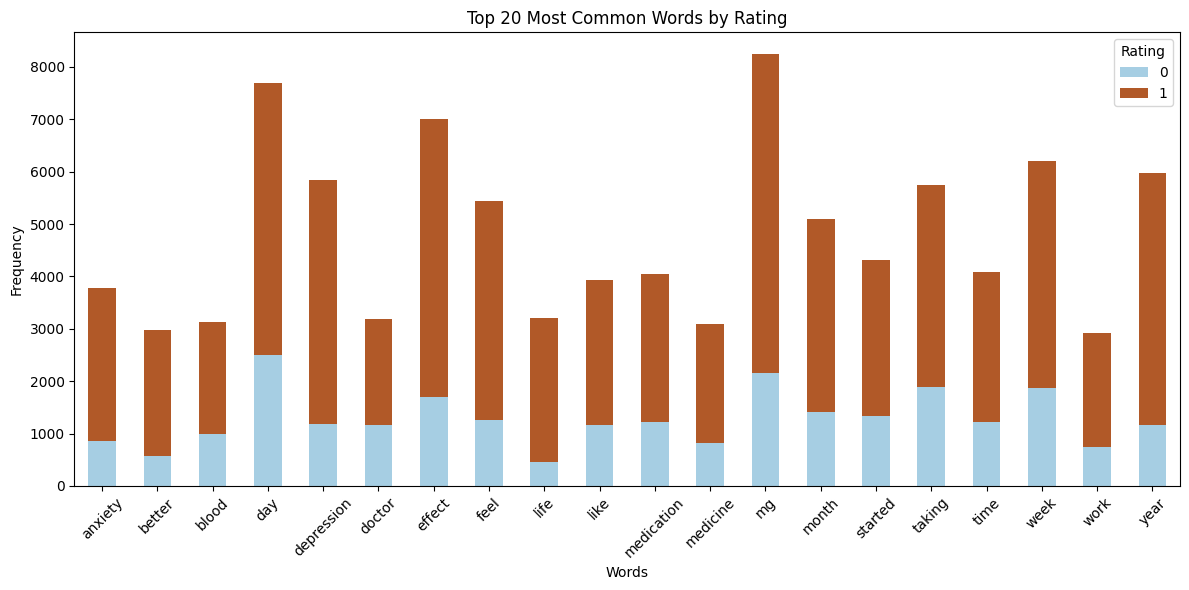

In [121]:
grouped = word_count.groupby('Sentiment_encoded').sum()
grouped.T.plot(kind='bar', figsize=(12, 6), colormap='Paired', stacked=True)
plt.title("Top 20 Most Common Words by Rating")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.legend(title="Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [122]:
# TF-IDF Analysis

In [125]:
# Clean text data

from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import stopwords

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return ' '.join([word for word in text.split() if word not in stopwords.words('english')])


In [127]:
# Configure the TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=1000,         # limit to top 1000 terms
    stop_words='english',      # remove common English words
    ngram_range=(1, 2),        # include unigrams and bigrams
    min_df=5,                  # ignore rare terms
    max_df=0.8                 # ignore overly common terms
)


In [129]:
# Fit and Transform

# Apply the vectorizer to your cleaned text:
X_tfidf = tfidf.fit_transform(data['clean_review'])

# Convert it to a DataFrame for inspection:
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())


In [130]:
# Analyze by Group

# Group by label and take the mean:


tfidf_df['Sentiment'] = data['Sentiment_encoded']
mean_tfidf = tfidf_df.groupby('Sentiment').mean().T


In [133]:
# Sort and visualize top TF-IDF terms per sentiment group

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_7960\3690919237.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words[sentiment], y=top_words.index, palette='viridis')


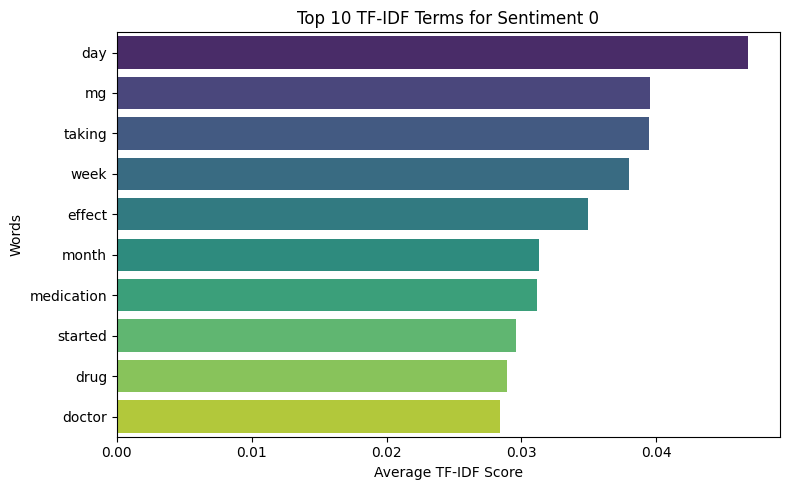

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_7960\3690919237.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words[sentiment], y=top_words.index, palette='viridis')


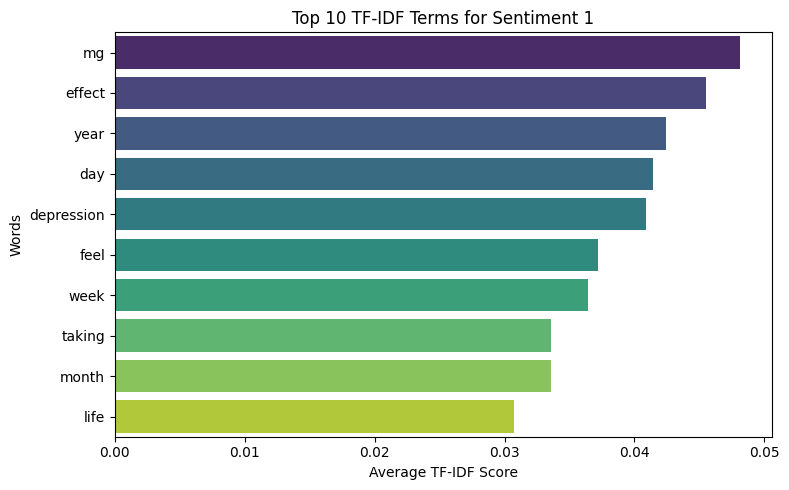

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

for sentiment in mean_tfidf.columns:
    top_words = mean_tfidf.sort_values(by=sentiment, ascending=False).head(10)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=top_words[sentiment], y=top_words.index, palette='viridis')
    plt.title(f"Top 10 TF-IDF Terms for Sentiment {sentiment}")
    plt.xlabel("Average TF-IDF Score")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.show()


In [138]:
# Condition vs Sentiment

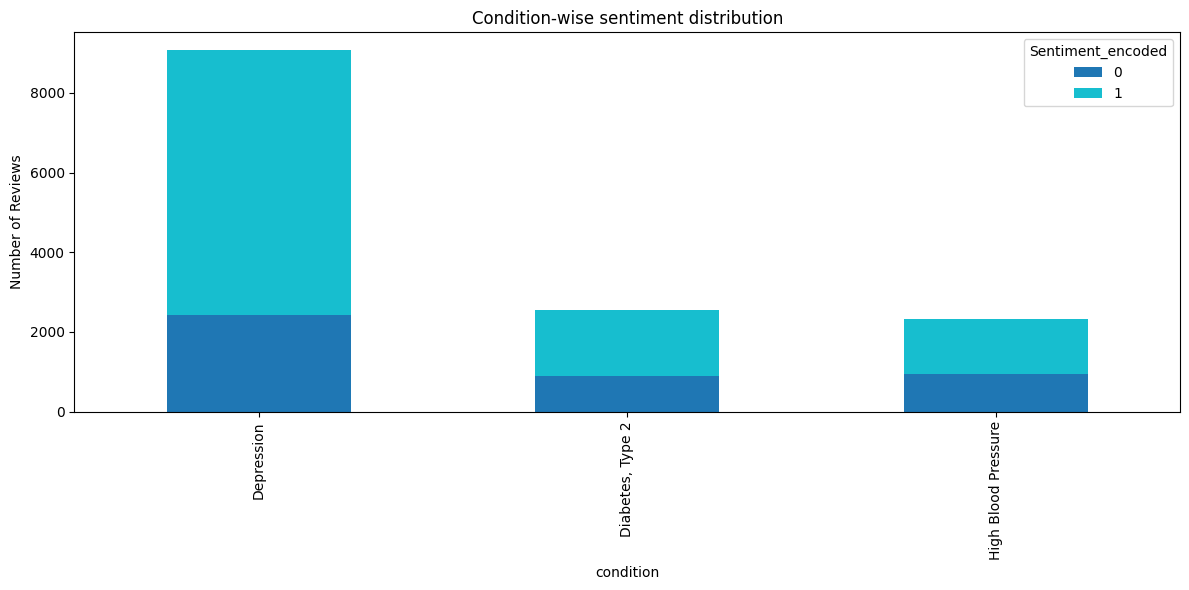

In [140]:
variation_feedback = data.groupby(['condition', 'Sentiment_encoded']).size().unstack().fillna(0)
variation_feedback.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Condition-wise sentiment distribution')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [142]:
# The actual numbers on the y-axis (i.e. the counts of reviews) come from this part of your code:

# variation_feedback = data.groupby(['condition', 'Sentiment_encoded']).size()

# That .size() is counting how many rows fall into each (condition, sentiment) combo. And since every row in your dataset represents one
# review (with a corresponding clean_review text), counting the rows is equivalent to counting the reviews.

In [22]:
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib

In [24]:
target_conditions = ["Depression", "High Blood Pressure", "Diabetes, Type 2"]
data = data[data["condition"].isin(target_conditions)].dropna(subset=["review"]).copy()

In [26]:
#Convert condition names into numeric labels: 0 = Depression, 1 = High BP, 2 = Diabetes.
label_map = {
    "Depression": 0,
    "High Blood Pressure": 1,
    "Diabetes, Type 2": 2
}
data["label"] = data["condition"].map(label_map)


In [28]:
#Clean the review text: remove HTML, punctuation, numbers, convert to lowercase, etc.
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"http\S+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\d+", "", text)
    return text.strip()

data["clean_review"] = data["review"].apply(clean_text)


In [30]:
#Split dataset into train and test sets using 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    data["clean_review"], data["label"], test_size=0.2, stratify=data["label"], random_state=42
)

In [32]:
#Convert text into numerical format using TF-IDF with 5000 most important words.
tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [34]:
#Train a Logistic Regression classifier to learn from patient reviews.
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [36]:
#Use Precision, Recall, F1-score, and Accuracy to check performance.
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred, target_names=label_map.keys()))


                     precision    recall  f1-score   support

         Depression       0.94      0.99      0.96      1814
High Blood Pressure       0.95      0.84      0.89       464
   Diabetes, Type 2       0.96      0.91      0.94       511

           accuracy                           0.95      2789
          macro avg       0.95      0.91      0.93      2789
       weighted avg       0.95      0.95      0.95      2789



In [38]:
#Save trained model and vectorizer using joblib for deployment.
joblib.dump(model, "drug_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [41]:
# Accuracy and AUC-ROC curve

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import label_binarize

# Predict class probabilities for ROC AUC
y_prob = model.predict_proba(X_test_vec)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Binarize the output for multiclass ROC AUC calculation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# ROC AUC score with macro average (suitable for multiclass)
roc_auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
print("ROC AUC Score (macro avg):", roc_auc)


Accuracy: 0.9476514879885264
ROC AUC Score (macro avg): 0.993863562655161


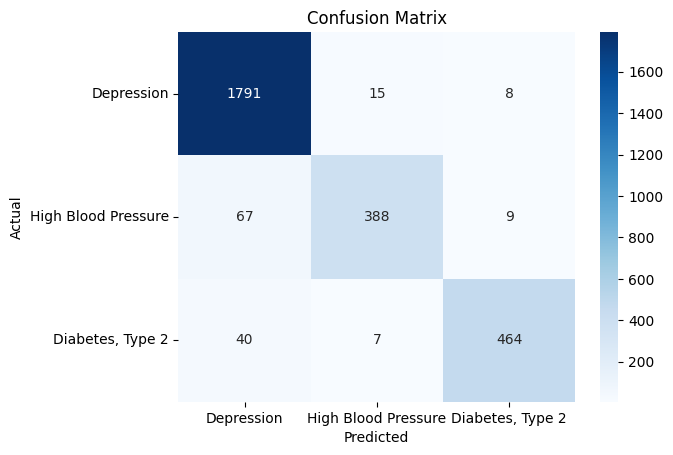

In [47]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d",cmap="Blues", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# ROC curve

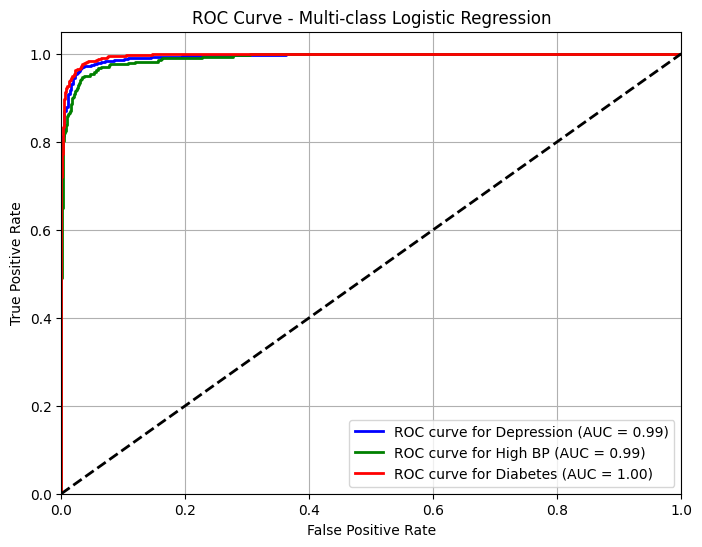

In [49]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_prob = model.predict_proba(X_test_vec)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red']
class_names = ['Depression', 'High BP', 'Diabetes']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for {class_names[i]} (AUC = {roc_auc[i]:0.2f})')

# Plot diagonal
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-class Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [291]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier , LogisticRegression
import itertools

In [292]:
x = data["clean_review"]
y = data["label"]

In [293]:
x

0        i have taken antidepressants for years with so...
1        week on zoloft for anxiety and mood swings i t...
2        my gp started me on venlafaxine yesterday to h...
3        hey guys  its been  months since my last post ...
4        this medicine saved my life i was at my wits e...
                               ...                        
13939    it is fourth blood pressure pill for me it fee...
13940    while on bystolic my feet and arms were numb m...
13941    i just got diagnosed with type  my doctor pres...
13942    this is the third med ive tried for anxiety an...
13943    i have only been on tekturna for  days the eff...
Name: clean_review, Length: 13944, dtype: object

In [294]:
#Split dataset into train and test sets using 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    x,y , test_size=0.2, stratify=y, random_state=42
)

In [295]:
def plot_confusion_matrix(cm,classes,
                         normalize=False,
                         title='confusion matrix',
                         cmap=plt.cm.Blues):


    plt.imshow(cm,interpolation='nearest' , cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print('normalized confusion matrix')

    else:
        print('confusion matrix' )

    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment='center',
                color='white'if cm[i,j]> thresh else 'black')

    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')



### Bag of Words

In [297]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

## Machine Learning Model :- Naive Bayes 
## Accuracy :- 94%

accuracy:  0.949
confusion matrix


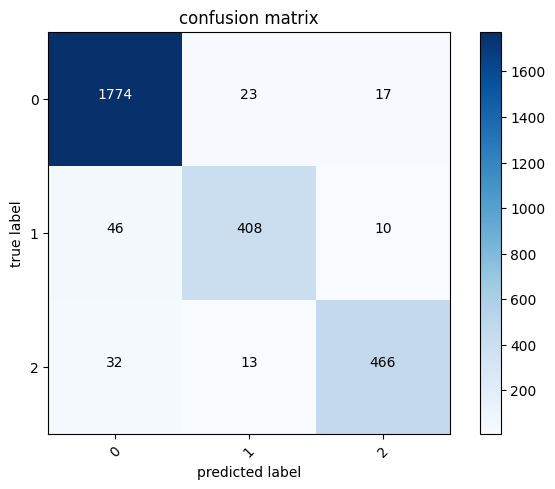

In [299]:

mnb = MultinomialNB()
mnb.fit(count_train,y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test,pred)
print('accuracy:  %0.3f' % score)

cm = metrics.confusion_matrix(y_test,pred,labels=[0,1,2])
plot_confusion_matrix(cm,classes=[0,1,2])

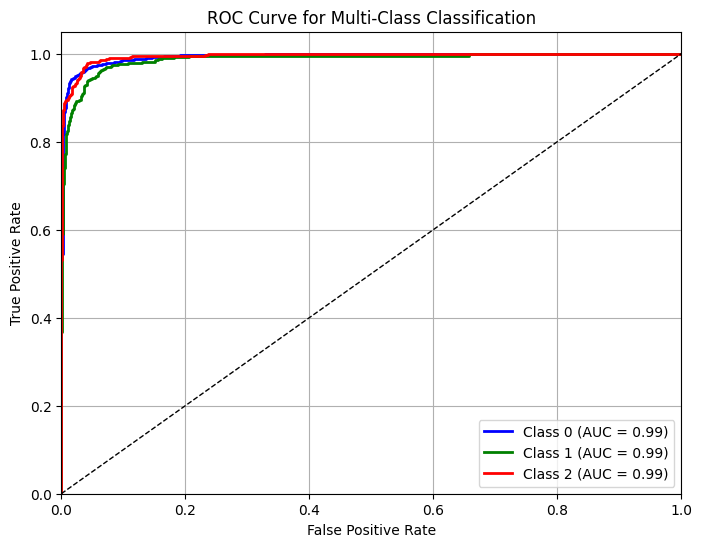

In [300]:

# Binarize the output labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Re-fit classifier in One-vs-Rest mode
classifier = OneVsRestClassifier(MultinomialNB())
classifier.fit(count_train, label_binarize(y_train, classes=[0, 1, 2]))

# Get probability scores for test set
y_score = classifier.predict_proba(count_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()


##  Machine Learning Model : Passive Aggressive Classifier
## Accuracy :- 95%

accuracy: 0.952
confusion matrix


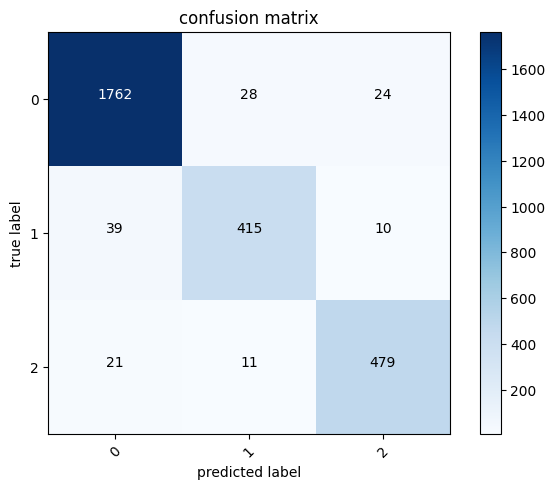

In [302]:
passive = PassiveAggressiveClassifier()
passive.fit(count_train , y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test,pred)
print('accuracy: %0.3f' % score)
cm = metrics.confusion_matrix(y_test,pred,labels=[0,1,2])
plot_confusion_matrix(cm,classes=[0,1,2])

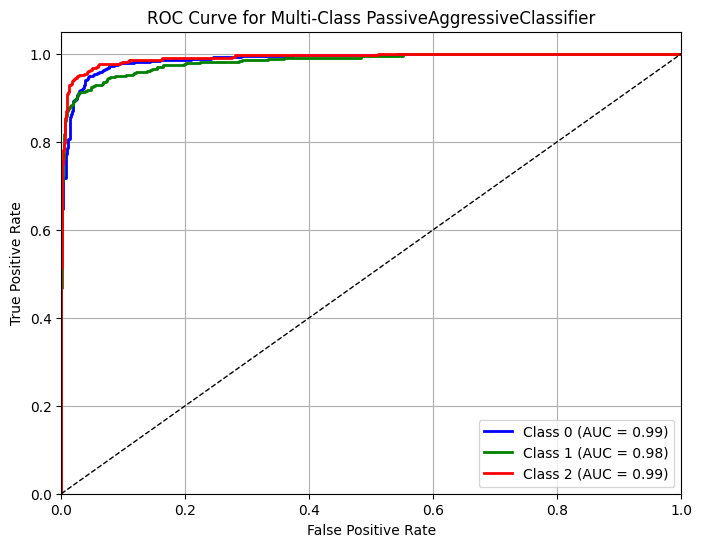

In [303]:
# Binarize the labels (needed for ROC curve in multi-class)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Train One-vs-Rest model
ovr_classifier = OneVsRestClassifier(PassiveAggressiveClassifier())
ovr_classifier.fit(count_train, y_train_bin)

# Predict decision scores (not probabilities for PassiveAggressive)
y_score = ovr_classifier.decision_function(count_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class PassiveAggressiveClassifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()


### TFIDF

In [305]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

## Machine Learning Model : Naive Bayes with TFIDF
## Accuracy :- 87%

Accuracy: 0.872
confusion matrix


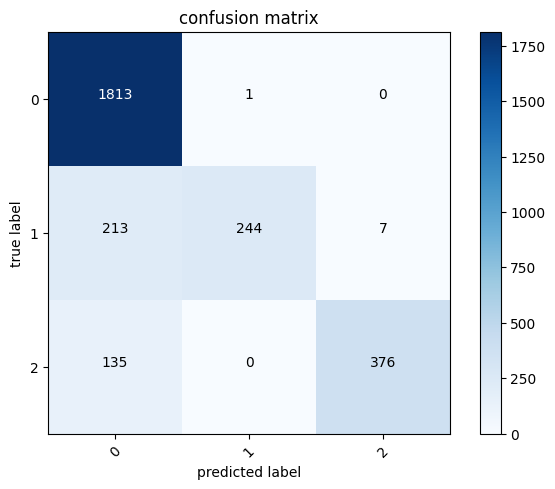

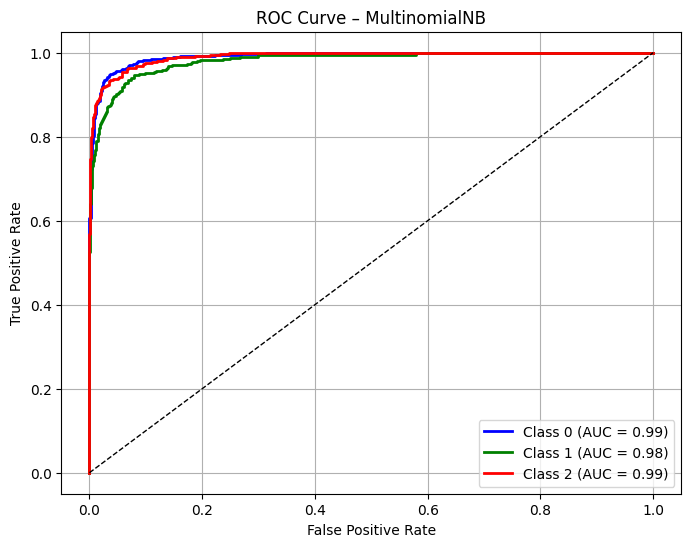

Macro AUC: 0.988
Micro AUC: 0.976


In [307]:
# Step 1: Fit TfidfVectorizer only on training data
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)       # Correct
tfidf_test = tfidf_vectorizer.transform(X_test)             # Don't fit again

# Step 2: Train the classifier
mnb = MultinomialNB()
mnb.fit(tfidf_train, y_train)

# Step 3: Predict
pred = mnb.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy: %.3f' % score)

# Step 4: Confusion Matrix
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1, 2])
plot_confusion_matrix(cm, classes=[0, 1, 2])

# Step 5: ROC AUC Curve (Multiclass)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = mnb.predict_proba(tfidf_test)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – MultinomialNB')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print("Macro AUC: %.3f" % roc_auc_score(y_test_bin, y_score, average='macro'))
print("Micro AUC: %.3f" % roc_auc_score(y_test_bin, y_score, average='micro'))


## Machine Learning Model : Passive Aggressive Classifier with TFIDF
## Accuracy :- 96%

accuracy: 0.961
confusion matrix


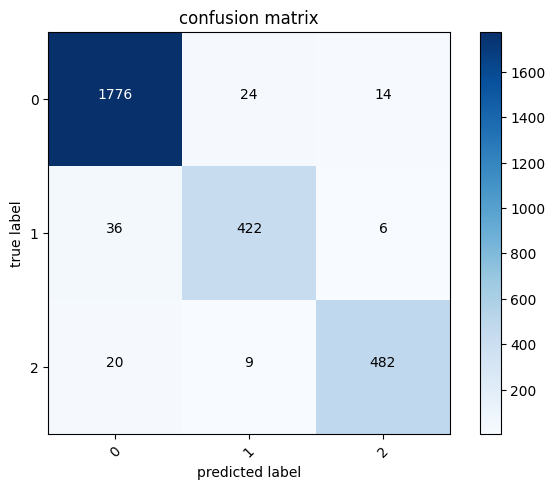

In [309]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train , y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test,pred)
print('accuracy: %0.3f' % score)
cm = metrics.confusion_matrix(y_test,pred,labels=[0,1,2])
plot_confusion_matrix(cm,classes=[0,1,2])

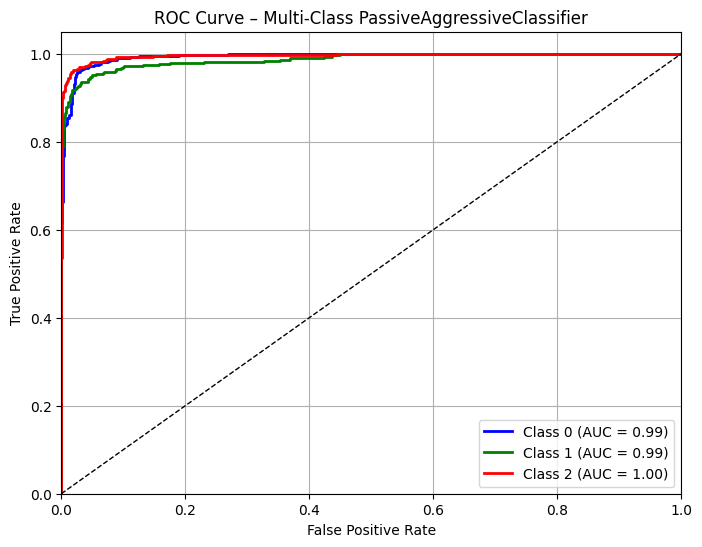

Micro-average AUC: 0.994
Macro-average AUC: 0.992


In [310]:
# Step 1: Binarize the output labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Step 2: Train OvR classifier
ovr_clf = OneVsRestClassifier(PassiveAggressiveClassifier())
ovr_clf.fit(tfidf_train, y_train_bin)

# Step 3: Get decision scores
y_score = ovr_clf.decision_function(tfidf_test)

# Step 4: Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 5: Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Multi-Class PassiveAggressiveClassifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Step 6 (Optional): Print macro & micro average AUC
print("Micro-average AUC: {:.3f}".format(roc_auc_score(y_test_bin, y_score, average='micro')))
print("Macro-average AUC: {:.3f}".format(roc_auc_score(y_test_bin, y_score, average='macro')))


## TFIDF : Bigrams

In [312]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english',max_df=0.8,ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

accuracy: 0.965
confusion matrix


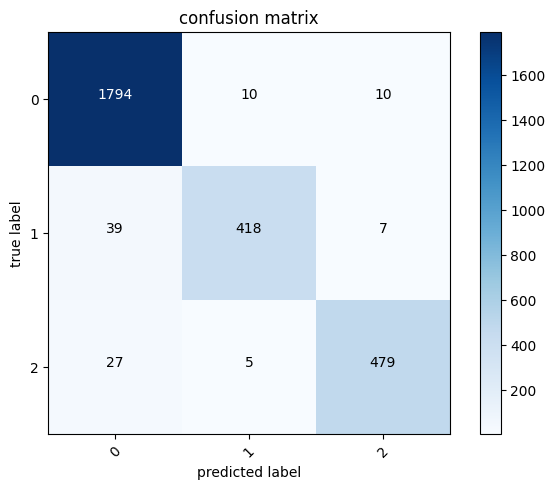

In [313]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2 , y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test,pred)
print('accuracy: %0.3f' % score)
cm = metrics.confusion_matrix(y_test,pred,labels=[0,1,2])
plot_confusion_matrix(cm,classes=[0,1,2])

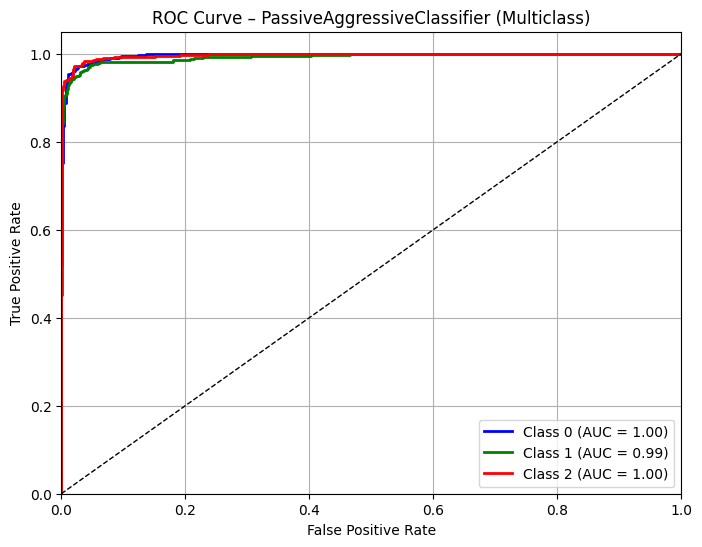

Micro-average AUC: 0.997
Macro-average AUC: 0.995


In [314]:
# Step 1: Binarize labels (for multi-class ROC AUC)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Step 2: Refit classifier using OneVsRest for decision_function()
ovr_passive = OneVsRestClassifier(PassiveAggressiveClassifier())
ovr_passive.fit(tfidf_train_2, y_train_bin)

# Step 3: Get decision function scores
y_score = ovr_passive.decision_function(tfidf_test_2)

# Step 4: Calculate FPR, TPR, AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 5: Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Class {0} (AUC = {1:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – PassiveAggressiveClassifier (Multiclass)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Step 6: Optional — print micro and macro average AUC
print("Micro-average AUC: {:.3f}".format(roc_auc_score(y_test_bin, y_score, average='micro')))
print("Macro-average AUC: {:.3f}".format(roc_auc_score(y_test_bin, y_score, average='macro')))


## TFIDF : Trigrams

In [316]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english',max_df=0.8,ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

accuracy: 0.965
confusion matrix


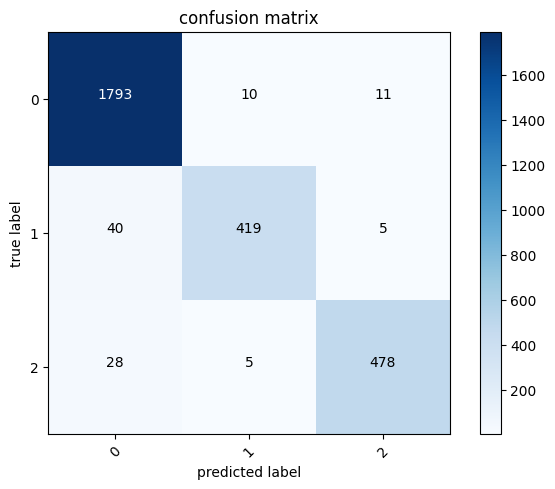

In [317]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3 , y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test,pred)
print('accuracy: %0.3f' % score)
cm = metrics.confusion_matrix(y_test,pred,labels=[0,1,2])
plot_confusion_matrix(cm,classes=[0,1,2])

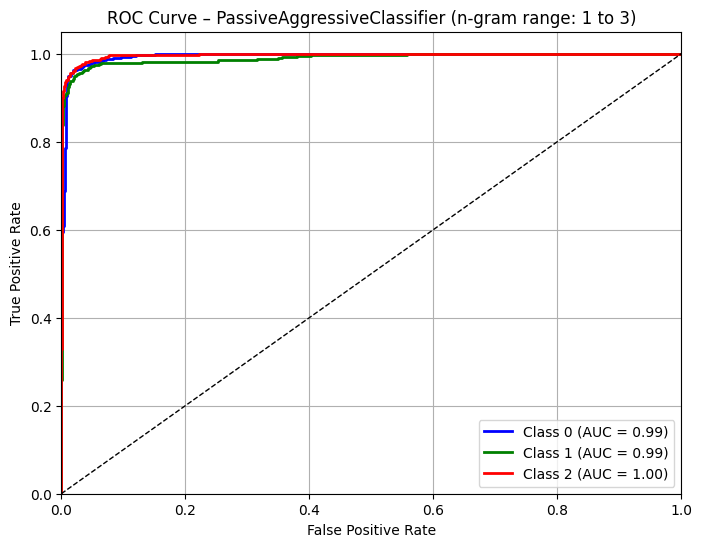

Micro-average AUC: 0.996
Macro-average AUC: 0.994


In [318]:
# Step 1: Binarize the output labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Step 2: One-vs-Rest wrapper with PassiveAggressiveClassifier
ovr_passive = OneVsRestClassifier(PassiveAggressiveClassifier())
ovr_passive.fit(tfidf_train_3, y_train_bin)

# Step 3: Get decision function scores (since predict_proba not available)
y_score = ovr_passive.decision_function(tfidf_test_3)

# Step 4: Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 5: Plot ROC curve
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – PassiveAggressiveClassifier (n-gram range: 1 to 3)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Step 6: Print average AUCs
print("Micro-average AUC: {:.3f}".format(roc_auc_score(y_test_bin, y_score, average='micro')))
print("Macro-average AUC: {:.3f}".format(roc_auc_score(y_test_bin, y_score, average='macro')))


## Most Important Features

In [320]:
def most_informative_feature_for_class(vectorizer,classifier,classlabel,n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out()
    topn = sorted(zip(classifier.coef_[labelid],feature_names))[-n:]

    for coef, feat in topn:
        print(classlabel,feat,coef)



 "Depression": 0,
 
 "High Blood Pressure": 1,
    
 "Diabetes, Type 2": 2

In [322]:
# 'Depression'
most_informative_feature_for_class(tfidf_vectorizer , pass_tf,0)

0 impact 0.7359302978515682
0 lossfatigue 0.7822988887466255
0 alot 0.8338218681810627
0 psychologically 0.8427422978175566
0 subdural 1.2687836850905725
0 symp 1.3973475710268235
0 repeating 1.5282783270887763
0 acted 2.2754553164532867
0 vision 2.9837132929457946
0 tyroid 3.0901908644240623


In [323]:
#'High Blood Pressure'
most_informative_feature_for_class(tfidf_vectorizer , pass_tf,1)

1 quotside 0.6523887495156206
1 counter 0.65377967159559
1 quotseriousquot 0.8089956598749105
1 enlarge 0.8313300000103515
1 decently 0.9459776086044851
1 swatted 0.9967751159173096
1 quotlevelnessquot 1.0965350047107671
1 instead 1.39810768651958
1 thorazine 1.9250509143329213
1 roundabout 3.0702143673883335


In [324]:
#'Diabetes, Type 2'
most_informative_feature_for_class(tfidf_vectorizer , pass_tf,2)

2 reactions 0.6606554145279028
2 reactive 0.6709171931055703
2 accidently 0.6939391520229622
2 doesnot 0.7544227411866621
2 depession 0.7582175800268842
2 climbed 1.046477236511601
2 rationally 1.424968494481603
2 knew 2.0555035191797493
2 diter 2.8497650773788004
2 bully 6.840981466887745


# Support Vector Machine

In [162]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [169]:
data

,drugName,condition,review,rating,date,usefulCount,clean_review,review_length,Sentiment,Sentiment_encoded,label
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,2017-03-09,54,i have taken antidepressants for years with so...,43,positive,1,0
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,2011-05-07,3,week on zoloft for anxiety and mood swings i t...,28,positive,1,0
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,2016-04-27,3,my gp started me on venlafaxine yesterday to h...,69,negative,0,0
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,2017-10-24,24,hey guys its been months since my last post ...,63,positive,1,2
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,2013-06-20,166,this medicine saved my life i was at my wits e...,51,positive,1,0
...,...,...,...,...,...,...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4,2009-07-15,39,it is fourth blood pressure pill for me it fee...,18,negative,0,1
13940,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1,2009-07-18,25,while on bystolic my feet and arms were numb m...,36,negative,0,1
13941,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9,2015-10-23,47,i just got diagnosed with type my doctor pres...,21,positive,1,2
13942,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2,2016-07-17,33,this is the third med ive tried for anxiety an...,19,negative,0,0


In [171]:
# Train - test split

X = data['clean_review']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [173]:
# Text Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [175]:
# Train SVM Classifier

svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train_vec, y_train)


SVC(C=1, kernel='linear', random_state=42)

In [177]:
 # Evaluate the Model

y_pred = svm_model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9573323771961276
Confusion Matrix:
 [[1776   18    6]
 [  55  425    8]
 [  22   10  469]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1800
           1       0.94      0.87      0.90       488
           2       0.97      0.94      0.95       501

    accuracy                           0.96      2789
   macro avg       0.96      0.93      0.94      2789
weighted avg       0.96      0.96      0.96      2789



In [179]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics


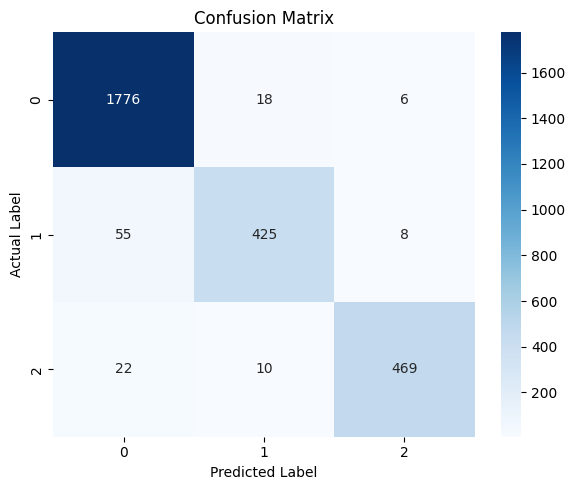

In [181]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

# Plotting Confusion Matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Call the function
plot_confusion_matrix(cm, classes=[0, 1, 2])

In [183]:
# Accuracy score

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.9573323771961276


In [185]:
# ROC AUC Score for Multi-Class


# Since your target has 3 classes, use roc_auc_score with multi_class='ovr' (One-vs-Rest strategy).

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output labels for ROC AUC (One-hot encoding)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

# Compute ROC AUC Score (macro-average)
auc_score = roc_auc_score(y_test_bin, y_pred_bin, average='macro', multi_class='ovr')
print("ROC AUC Score (macro):", auc_score)


ROC AUC Score (macro): 0.9495920210730026


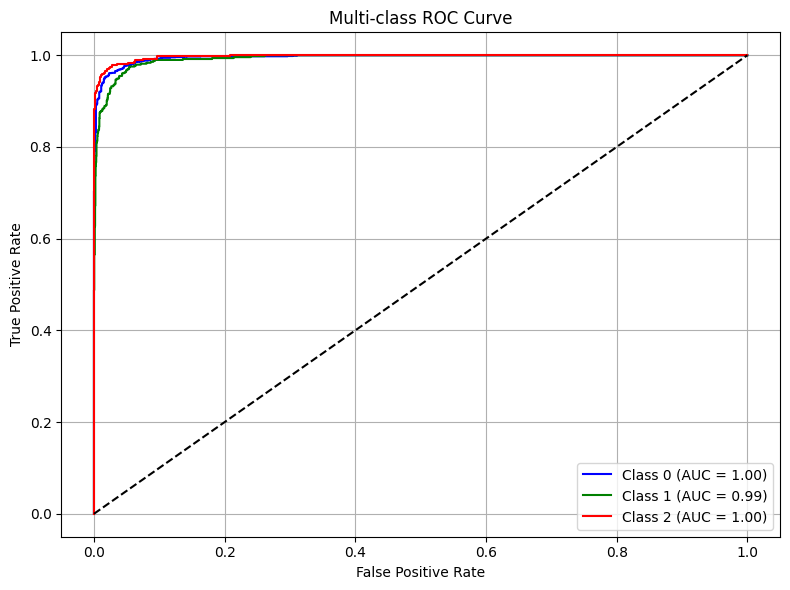

In [187]:
# ROC Curve (Visualization)

# To plot the ROC curve, use the decision function or probability scores (SVM with probability=True):

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Re-train with probability=True if not already
svm_model = SVC(kernel='linear', C=1, probability=True, random_state=42)
svm_model.fit(X_train_vec, y_train)

# Predict probabilities
y_score = svm_model.predict_proba(X_test_vec)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3

# Binarize y_test again
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
